# 0.0 Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

# 1.0 Load Dataset

Usando a função `fetch_openml('mnist_784')` com o parâmetro 'mnist_784' conseguimos carregar um dataset que contém os pixels de caracteres númericos escritos a mão. Esse dataset contém dados referentes à 70 mil imagens, em cada uma dela possui dimensão 28x28 (784) pixels

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

y = np.array(y, dtype=int)

In [3]:
X.shape

(70000, 784)

In [4]:
# dataset em que cada linha representa os pixels de uma imagem, sendo que cada píxel varia entre 0 e 255.
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# pixels da primeira imagem
X.iloc[0].values.reshape(28,28)[::4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# targets das 10 primeiras imagens, como podemos ver os pixels das 10 primeiras linhas do dataframe 'X' representam
# os algarismos 5, 0, 4, 1, 9, 2, 1, 3, 1, 4
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

Vamos plotar as imagens referentes aos 10 primeiros registros de `X`

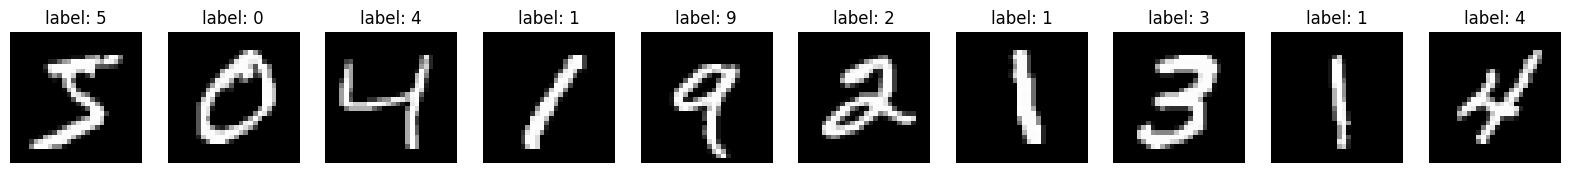

In [7]:
N = 10

fig, axes = plt.subplots(1, N, figsize=(2*N, 2))

for ax, image, label in zip(axes, X.values, y):
    ax.set_title(f'label: {label}')
    ax.axis('off')
    ax.imshow(image.reshape(28,28), cmap='gray')

# 2.0 Train Test Split

Usando apenas a biblioteca `numpy` vamos separar o conjunto de dados `X` em treino e teste, sendo que 70% dos dados serão designados para treino e em seguida vamos dividir o conjunto restante em teste e validação. Para fazermos isso, definimos um conjunto auxiliar chamado `X_rest`.

* `X`
    * `X_rest` - 70%
    * `X_test` - 30%
    
    
* `X_rest`
    * `X_train` - 70%
    * `X_valid` - 30%

O comando `np.zeros((0, 784))` cria uma array com 0 linhas e 784 colunas, basicamente estamos criando um array vazia, afinal ela tem 0 linhas, mas que virtualmente possui 784 colunas. Isso foi feito de modo que ao utilizarmos comando `np.r_[]` pela primeira vez dentro do laço for, ele  apenas adicionará as linhas do dataframe `X` equivalente ao label `y = 0`, uma vez que estaremos empilhando esse subconjunto debaixo de um conjunto vázio. Para os demais valores de `i` no loop, o comando `np.r_[]` simplesmente adicionará o subconjunto referente a classe `i` em baixo da array `X_test`, aumentando assim o número de linhas.

In [8]:
X_test = np.zeros((0, 784))
y_test = np.array([])

X_rest = np.zeros((0, 784))
y_rest = np.array([])


for i in range(10):
    idx = np.where(y == i)[0]   # retorna os indices das linhas que representam o algarismo 'i'
    
    X_test_i, X_rest_i = np.array_split(X.values[idx], [int(X.values[idx].shape[0] * 0.3)])
    X_test = np.r_[X_test, X_test_i]
    X_rest = np.r_[X_rest, X_rest_i]
    
    y_test_i, y_rest_i = np.array_split(y[idx], [int(y[idx].shape[0] * 0.3)])
    y_test = np.r_[y_test, y_test_i]
    y_rest = np.r_[y_rest, y_rest_i]
    
    

X_train, X_valid = np.zeros((0, 784)), np.zeros((0, 784))
y_train, y_valid = np.zeros([]), np.zeros([])



for i in range(10):
    idx = np.where(y_rest == i)[0]
    
    X_valid_i, X_train_i = np.array_split(X_rest[idx], [int(X_rest[idx].shape[0] * 0.3)])
    X_valid = np.r_[X_valid, X_valid_i]
    X_train = np.r_[X_train, X_train_i]
    
    
    y_valid_i, y_train_i = np.array_split(y_rest[idx],[int(y_rest[idx].shape[0] * 0.3)])
    y_valid = np.r_[y_valid, y_valid_i]
    y_train = np.r_[y_train, y_train_i]


#### Destrinchando o código acima

O comando `np.where()` recebe uma expressão lógica aplicada a um vetor e retorna uma tupla contendo os indices do vetor em que a expressão é verdadeira.

In [9]:
# ao usarmos 'y == 0' como condição, recebemos como retorno as posições do vetor y em que a condição é verdadeira,
# se voltarmos na imagem dos caracteres vemos que a segunda imagem, equivalente ao indice 1, de fato representa
# o algarismo 0
idx = np.where(y == 0)
idx

(array([    1,    21,    34, ..., 69964, 69983, 69993]),)

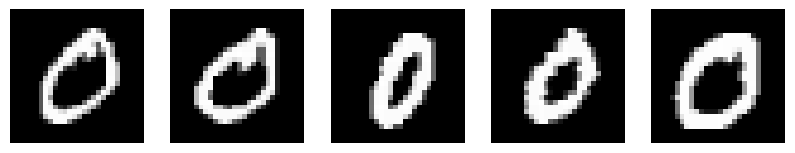

In [10]:
# plotando as 5 primeiras posições em idx, vemos que de fato elas representam o algarismo '0'
fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for ax, index in zip(axes, idx[0][:5]):
    ax.axis('off')
    ax.imshow( X.iloc[index].values.reshape(28, 28), cmap='gray' )

O comando abaixo `np.array_split()` retorna uma lista com o conjunto de dados divido, sendo que o primeiro elemento da lista possuirá o número de linhas especificado dentro de uma lista no segundo argumento. No código, estamos pegando as 30% primeiras linhas do conjunto `X` equivalente ao algorismo `i` (no caso abaixo i=0) e guardarmos o seu valor na varíavel `X_test_i`. 

In [11]:
idx = np.where(y == 0)[0]

np.array_split(X.values[idx], [int(X.values[idx].shape[0] * 0.3)])

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [12]:
# as 30% primeiras linhas equivalente aos algarismo equivalem a 2070 dados/imagens
int(X.values[idx].shape[0] * 0.3)

2070

Quando estamos trabalhando com arrays de duas dimensões, o comando `np.r_[]` empilha as arrays passadas uma em cima da outra.

In [13]:
np.r_[ [1, 2, 3], [4, 5, 6], [7, 8, 9] ]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np.r_[ [[1, 2, 3], [1, 2, 3]], [[4, 5, 6], [4, 5, 6]], [[7, 8, 9], [7, 8, 9]] ]

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6],
       [4, 5, 6],
       [7, 8, 9],
       [7, 8, 9]])

In [15]:
np.r_[ np.zeros((2, 10)), np.ones((2, 10)) ]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

#### Continuação

Esse é um problema multiclasse uma vez que no conjunto de dados possuímos 10 algarismo diferentes (10 labels). Vamos simplificar e tornar esse problema em uma classificação binária, para isso vamos realizar a classificação apenas nos algarismos `1` e `7`.

In [9]:
# conjunto de treinamento
X_train_17 = np.concatenate( ( X_train[np.where(y_train == 1)], X_train[np.where(y_train == 7)] ) )
y_train_17 = np.concatenate( ( y_train[np.where(y_train == 1)], y_train[np.where(y_train == 7)] ) )

y_train_17 = np.where( y_train_17 == 1, 0, 1 )  # atribui a classe 0 ao algarismo '1' e classe 1 ao '7'


# conjunto de teste
X_test_17 = np.concatenate( ( X_test[np.where(y_test == 1)], X_test[np.where(y_test == 7)] ) )
y_test_17 = np.concatenate( ( y_test[np.where(y_test == 1)], y_test[np.where(y_test == 7)] ) )

y_test_17 = np.where( y_test_17 == 1, 0, 1 )  # atribui a classe 0 ao algarismo '1' e classe 1 ao '7'


# conjunto de validação
X_valid_17 = np.concatenate( ( X_valid[np.where(y_valid == 1)], X_valid[np.where(y_valid == 7)] ) )
y_valid_17 = np.concatenate( ( y_valid[np.where(y_valid == 1)], y_valid[np.where(y_valid == 7)] ) )

y_valid_17 = np.where( y_valid_17 == 1, 0, 1 )  # atribui a classe 0 ao algarismo '1' e classe 1 ao '7'

* Classe 0 -> algarismo `1`
* Classe 1 -> algarismo `7`

# 3.0 Training

$J(\vec{\theta}) = -\frac{1}{m} \sum_{j=1}^m \;\left[y^{(j)}\;log(\;f_{\vec{\theta}}(x^{(j)})\;)\;+\;(1-y^{(j)})\;log(\;1-f_{\vec{\theta}}(x^{(j)})\;)\right]$

$J(\vec{\theta}) = -\frac{1}{m} \sum_{j=1}^m \;\left[y^{(j)}\;log(\;\hat{y}^{(j)}\;)\;+\;(1-y^{(j)})\;log(\;1-\hat{y}^{(j)}\;)\right]$

In [22]:
def cross_entropy_loss(y, y_hat):
    return ( -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat) ).mean()


def sigmoid(x):
    return ( 1. / (1. + np.exp(-x)) )

$\vec{\theta}_{k+1} = \vec{\theta}_{k} - \alpha \nabla J(\vec{\theta}_{k})$

$\nabla J(\vec{\theta}) = X^{T} \left[ f_{\vec{\theta}}\left( \vec{\theta}^{T} X \right) - y \right]$

$\nabla J(\vec{\theta}) = X^{T} \left[ \hat{y} - y \right]$

In [108]:
lr = 0.01       # learning rate
n_iter = 100    # number of iterations
k = 10          # intervals to check loss and weight visualization

trunc_1 = 0.000000001
trunc_2 = 0.999999999

# define weights of size (n,) where n = # total of features in this dataset
w = np.zeros(X_train_17.shape[1])

# store weights in this list after the i-th interval
w_k = []

# store training and validation losses
train_losses = []
valid_losses = []


# loop through n_iter iterations
for i in range(n_iter):
    
    # training
    z_train = X_train_17 @ w
    z_train = np.clip(z_train, -1000, 1000)
    y_train_hat = sigmoid(z_train)
    y_train_hat = np.clip(y_train_hat, trunc_1, trunc_2)
    
    d_w = np.dot( X_train_17.T, (y_train_hat - y_train_17) ) / y_train_17.shape[0]
    
    w = w - lr * d_w
    
    
    train_loss = cross_entropy_loss(y_train_17, y_train_hat)
    train_losses.append(train_loss)
    
    
    # validation
    z_valid = X_valid_17 @ w
    z_valid = np.clip(z_valid, -1000, 1000)
    y_valid_hat = sigmoid(z_valid)
    y_valid_hat = np.clip(y_valid_hat, trunc_1, trunc_2)
    
    valid_loss = cross_entropy_loss(y_valid_17, y_valid_hat)
    valid_losses.append(valid_loss)
    
    if i == 1:
        w_1 = w
  
        
    if (i + 1) % (n_iter / k) == 0:
        
        w_k.append(w)
        
        print("train loss: {:01.5f}".format(train_loss), end=' ')
        print("valid loss: {:01.5f}".format(valid_loss))
    

/tmp/ipykernel_16443/1628842634.py:6: RuntimeWarning: overflow encountered in exp
  return ( 1. / (1. + np.exp(-x)) )


train loss: 0.27681 valid loss: 0.31414
train loss: 0.20535 valid loss: 0.25384
train loss: 0.18247 valid loss: 0.19753
train loss: 0.14415 valid loss: 0.15616
train loss: 0.14064 valid loss: 0.12120
train loss: 0.12743 valid loss: 0.10178
train loss: 0.10741 valid loss: 0.09539
train loss: 0.09341 valid loss: 0.08333
train loss: 0.08879 valid loss: 0.08290
train loss: 0.08260 valid loss: 0.07072


In [94]:
train_losses

[0.6931471805599452,
 0.5281953067725408,
 0.4221359917802843,
 0.36244723543693796,
 0.32310239351031034,
 0.312470978627703,
 0.29003324378293727,
 0.2916296713918252,
 0.2863443721489208,
 0.27680533132776225,
 0.26279165819610345,
 0.2515207361478823,
 0.2461262588888203,
 0.23743898317008102,
 0.23415341889397642,
 0.23018306457090468,
 0.2264138704705992,
 0.21880101031350072,
 0.21068759572613643,
 0.2053478141373387,
 0.20223613681182487,
 0.20013288858484463,
 0.20011537008801134,
 0.19793137880783504,
 0.1967896713832826,
 0.19573729380049784,
 0.19379161326834982,
 0.1887461703285787,
 0.18671648465801077,
 0.1824663800263274,
 0.18107770071984577,
 0.17952642514183736,
 0.1755397064266512,
 0.1715258869651676,
 0.16357626301650247,
 0.15758857011496122,
 0.15563462845208553,
 0.152214886491995,
 0.14577937337876148,
 0.1441532837139456,
 0.14479974082542044,
 0.1444992091720205,
 0.1445485802346639,
 0.14399114407623095,
 0.14348745076702668,
 0.14335664796987,
 0.142707944

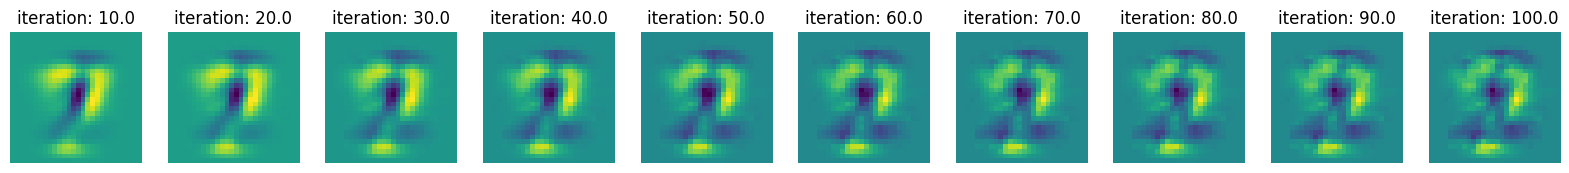

In [60]:
# define matplotlib figure and axes to plot weights from k intervals
fig, axes = plt.subplots(1, k, figsize=(2*k, 2))

# plot figures
for i, (ax, image) in enumerate(zip(axes, w_k)):  
    ax.set_title("iteration: {}".format((i+1)*(n_iter/k)))
    ax.axis('off')
    ax.imshow(image.reshape(28,28), cmap=None)

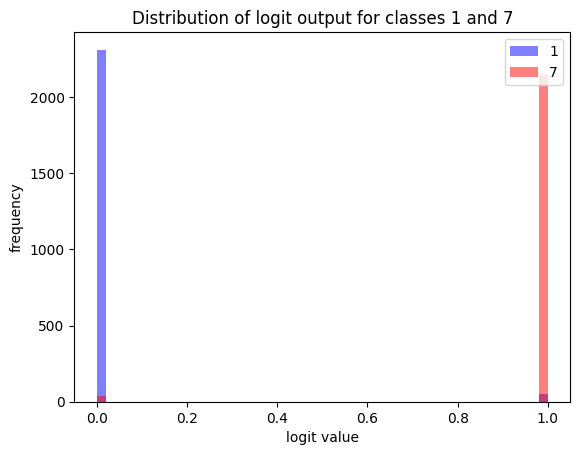

In [111]:
z = X_test_17 @ w_1
z = np.clip(z, -100, 100)
y_hat = sigmoid(z)
y_hat_0 = y_hat[np.where(y_test_17 == 0)]
y_hat_1 = y_hat[np.where(y_test_17 == 1)]


num_bins = 50
plt.hist(y_hat_0, num_bins, facecolor='blue', alpha=0.5, label='1')
plt.hist(y_hat_1, num_bins, facecolor='red', alpha=0.5, label='7')
plt.legend(loc='upper right')
plt.title('Distribution of logit output for classes 1 and 7', fontsize=12)
plt.xlabel('logit value', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.show()

In [112]:
y_hat[(y_hat > 0.0001) & (y_hat < 0.99999)]

array([0.9999795 , 0.99232179, 0.73193443, 0.99954052])